In [1]:
# load package
import shap
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
tf.compat.v1.disable_v2_behavior()
tf.compat.v1.enable_eager_execution()


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
model = keras.models.load_model("psychornot-keras-new-dimension")
aa="AGSTNQVILMFYWHPKREDC" #The twenty amino acids, grouped somewhat by feature
model.input

<KerasTensor: shape=(?, 20, 20, 1) dtype=float32 (created by layer 'flatten_input')>

In [13]:
background = tf.data.experimental.load("trainnewdimension.tf")
test = tf.data.experimental.load("testnewdimension.tf")
background_list = list(background.as_numpy_iterator())[0]
test_array= list(test.as_numpy_iterator())[0]
background = np.reshape(background_list[0][:100],(100,20,20,1))
test= np.reshape(test_array[0][:50],(50,20,20,1))


In [30]:
averages = (np.load("averagepsychro.npy"),np.load("averagethermo.npy"))
averages =np.array(averages).reshape((2,20,20,1))
averages.shape

(2, 20, 20, 1)

In [31]:
model.predict(averages)

array([[ 0.71806645, -0.5748656 ],
       [-0.8073034 ,  0.7218883 ]], dtype=float32)

In [15]:
explainer = shap.DeepExplainer(model, background)
explainer

In [32]:
shap_values = explainer.shap_values(averages)

In [33]:
shap_values[0].shape

(2, 20, 20, 1)

In [46]:
len(shap_values)

2

In [39]:
["Psychrophillic","Thermophillic"].shape


AttributeError: 'list' object has no attribute 'shape'

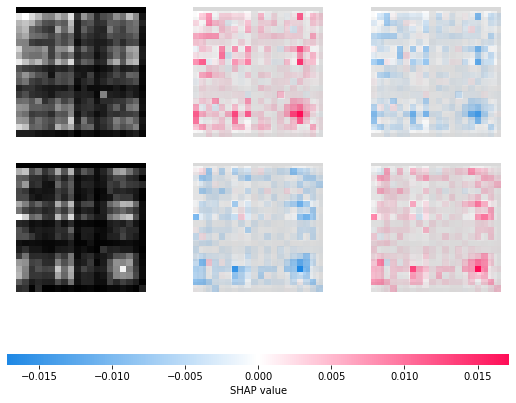

In [60]:
shap.image_plot(shap_values,averages)